In [7]:
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
import pandas as pd
import numpy as np
from scipy.stats.stats import pearsonr
from scipy.stats.mstats import winsorize
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.formula.api import ols
import statsmodels.api as sm
import scipy.stats
import os
import json

error_df_path = 'error_df.csv'

if not os.path.exists(error_df_path):
    exit()

C:\Users\satya\AppData\Local\Temp\ipykernel_12648\4229722992.py:5: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


             sum_sq     df          F        PR(>F)
task      40.170814    4.0  19.912018  4.403081e-12
Residual  50.435386  100.0        NaN           NaN
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
b5_euc s4_euc   0.0565  0.999 -0.5524  0.6654  False
b5_euc w1_euc  -0.4255 0.3025 -1.0344  0.1834  False
b5_euc w2_euc  -0.7568 0.0071 -1.3657 -0.1479   True
b5_euc w3_euc  -1.6383    0.0 -2.2471 -1.0294   True
s4_euc w1_euc   -0.482 0.1884 -1.0909  0.1268  False
s4_euc w2_euc  -0.8133 0.0031 -1.4222 -0.2045   True
s4_euc w3_euc  -1.6948    0.0 -2.3037 -1.0859   True
w1_euc w2_euc  -0.3313 0.5574 -0.9402  0.2776  False
w1_euc w3_euc  -1.2127    0.0 -1.8216 -0.6039   True
w2_euc w3_euc  -0.8814  0.001 -1.4903 -0.2725   True
----------------------------------------------------


w1_vec    0.991117
w2_vec    1.424108
w3_vec    1.366347
s4_vec    1.514974
b5_vec    1.680838
dtype: float64

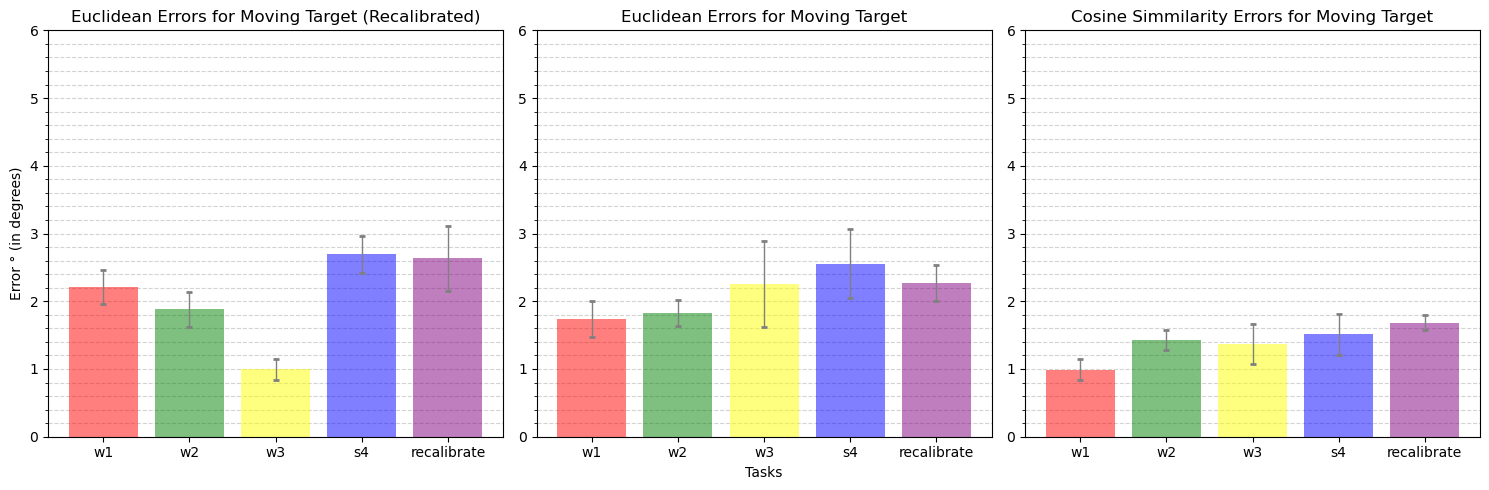

In [8]:
#Plotting means with CI of 95%

df = pd.read_csv(error_df_path, index_col=False)
df['w1_euc'] = df['w1_euc'].apply(lambda p: json.loads(p)[0][0])
df['w2_euc'] = df['w2_euc'].apply(lambda p: json.loads(p)[0][0])
df['w3_euc'] = df['w3_euc'].apply(lambda p: json.loads(p)[0][0])
df['s4_euc'] = df['s4_euc'].apply(lambda p: json.loads(p)[0][0])
df['b5_euc'] = df['b5_euc'].apply(lambda p: json.loads(p)[0][0])
df['callibrate_euc'] = df['callibrate_euc'].apply(lambda p: json.loads(p)[0][0])
df = df[['w1_euc', 'w2_euc', 'w3_euc', 's4_euc', 'b5_euc']]
for column in df:
    winsorize(df[column], limits=(0.2,0.2), inplace=True)
y1_std = df.std()/np.sqrt(df.shape[0])*1.96
y1vals = df.mean()
xvals = range(len(df.columns))
df_combined = pd.melt(df, var_name='task')
model = ols('value ~ task', data = df_combined).fit()
anova_result = sm.stats.anova_lm(model, typ=2)
tukey = pairwise_tukeyhsd(endog=df_combined['value'],
                          groups=df_combined['task'],
                          alpha=0.05)
print(anova_result)
print(tukey)


df = pd.read_csv(error_df_path, index_col=False)
df['w1_euc'] = df['w1_euc'].apply(lambda p: json.loads(p)[0][1])
df['w2_euc'] = df['w2_euc'].apply(lambda p: json.loads(p)[0][1])
df['w3_euc'] = df['w3_euc'].apply(lambda p: json.loads(p)[0][1])
df['s4_euc'] = df['s4_euc'].apply(lambda p: json.loads(p)[0][1])
df['b5_euc'] = df['b5_euc'].apply(lambda p: json.loads(p)[0][1])
df['callibrate_euc'] = df['callibrate_euc'].apply(lambda p: json.loads(p)[0][1])
df = df[['w1_euc', 'w2_euc', 'w3_euc', 's4_euc', 'b5_euc']]
for column in df:
    winsorize(df[column], limits=(0.2,0.2), inplace=True)
y2vals = df.mean()
y2_std = df.std()/np.sqrt(df.shape[0])*1.96
# df_combined = pd.melt(df, var_name='task')
# tukey = pairwise_tukeyhsd(endog=df_combined['value'],
#                           groups=df_combined['task'],
#                           alpha=0.05)
# print(tukey)


df = pd.read_csv(error_df_path, index_col=False)
df = df[['w1_vec', 'w2_vec', 'w3_vec', 's4_vec', 'b5_vec']]
for column in df:
    winsorize(df[column], limits=(0.2,0.2), inplace=True)
y3_std = df.std()/np.sqrt(df.shape[0])*1.96
y3vals = df.mean()
# df_combined = pd.melt(df, var_name='task')
# tukey = pairwise_tukeyhsd(endog=df_combined['value'],
#                           groups=df_combined['task'],
#                           alpha=0.05)
# print(tukey)

low = min(y1vals)
high = max(y1vals)
labels = [x[:-4] for x in df.columns]
labels = labels#[:-1]+['recalibrate']
colors=["red", "green", 'yellow', "blue", "purple", 'orange']
titles = ['Euclidean Errors for Moving Target (Recalibrated)', 'Euclidean Errors for Moving Target', 'Cosine Simmilarity Errors for Moving Target']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
axes[0].bar(xvals, y1vals, yerr=y1_std, align='center', alpha=0.5, color=colors, error_kw=dict(ecolor='gray', lw=1, capsize=2, capthick=2))
axes[1].bar(xvals, y2vals, yerr=y2_std, align='center', alpha=0.5, color=colors, error_kw=dict(ecolor='gray', lw=1, capsize=2, capthick=2))
axes[2].bar(xvals, y3vals, yerr=y3_std, align='center', alpha=0.5, color=colors, error_kw=dict(ecolor='gray', lw=1, capsize=2, capthick=2))
axes[0].set_ylabel('Error ° (in degrees)')
axes[1].set_xlabel('Tasks')

for index,ax in  enumerate(axes):
    ax.yaxis.set_minor_locator(tck.AutoMinorLocator())
    ax.yaxis.grid(color='lightgray', which='both', linestyle='dashed') 
    ax.set_axisbelow(True)
    plt.sca(ax)
    plt.xticks(range(len(df.columns)), labels)
    plt.title(titles[index])
    plt.ylim([0, 6])
    plt.axhline(y=100, zorder=0)


fig.tight_layout()   
df.mean()

     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
 group1   group2   meandiff p-adj    lower     upper   reject
-------------------------------------------------------------
b5_index s4_index -101.5873    0.0 -127.1414  -76.0332   True
b5_index w1_index -176.1905    0.0 -201.7445 -150.6364   True
b5_index w2_index -171.4286    0.0 -196.9826 -145.8745   True
b5_index w3_index -124.6032    0.0 -150.1572  -99.0491   True
s4_index w1_index  -74.6032    0.0 -100.1572  -49.0491   True
s4_index w2_index  -69.8413    0.0  -95.3953  -44.2872   True
s4_index w3_index  -23.0159 0.0983  -48.5699    2.5382  False
w1_index w2_index    4.7619 0.9854  -20.7922    30.316  False
w1_index w3_index   51.5873    0.0   26.0332   77.1414   True
w2_index w3_index   46.8254    0.0   21.2713   72.3795   True
-------------------------------------------------------------


w1_index     38.888889
w2_index     43.650794
w3_index     90.476190
s4_index    113.492063
b5_index    215.079365
dtype: float64

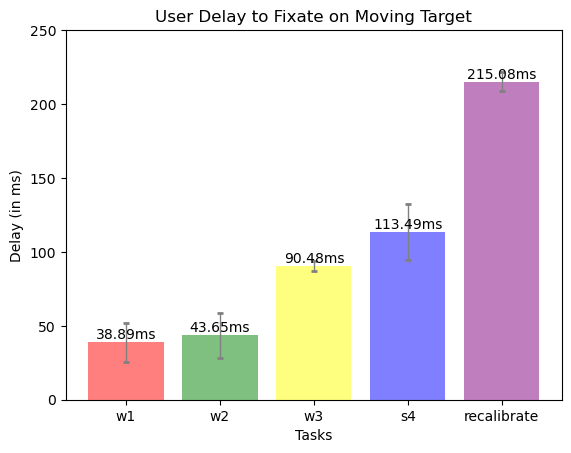

In [9]:
df = pd.read_csv(error_df_path, index_col=False)
df['w1_index'] = df['w1_index'].apply(lambda p: p*1000/60)
df['w2_index'] = df['w2_index'].apply(lambda p: p*1000/60)
df['w3_index'] = df['w3_index'].apply(lambda p: p*1000/60)
df['s4_index'] = df['s4_index'].apply(lambda p: p*1000/60)
df['b5_index'] = df['b5_index'].apply(lambda p: p*1000/60)
df['callibrate_index'] = df['callibrate_index'].apply(lambda p: p*1000/60)
df = df[['w1_index', 'w2_index', 'w3_index', 's4_index', 'b5_index']]
for column in df:
    winsorize(df[column], limits=(0.2,0.2), inplace=True)
df_combined = pd.melt(df, var_name='task')

tukey = pairwise_tukeyhsd(endog=df_combined['value'],
                          groups=df_combined['task'],
                          alpha=0.05)
print(tukey)

y_std = df.std()/np.sqrt(df.shape[0])*1.96
xvals = range(len(df.columns))
yvals = df.mean()+np.abs(df.values.min())
colors=["red", "green", 'yellow', "blue", "purple", 'orange']
labels = [x[:-6] for x in df.columns]
labels = labels[:-1]+['recalibrate']


bar1 = plt.bar(xvals, yvals, yerr=y_std, align='center', alpha=0.5, color=colors, error_kw=dict(ecolor='gray', lw=1, capsize=2, capthick=2))
plt.xticks(range(len(df.columns)), labels)
plt.ylabel('Delay (in ms)')
plt.xlabel('Tasks')
plt.ylim([0, 250])
plt.title('User Delay to Fixate on Moving Target')
for i,rect in enumerate(bar1):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, height, f'{height:.2f}' + 'ms', ha='center', va='bottom')
df.mean()

[3.1150028985464496e-38, 5.260560631401797e-85]

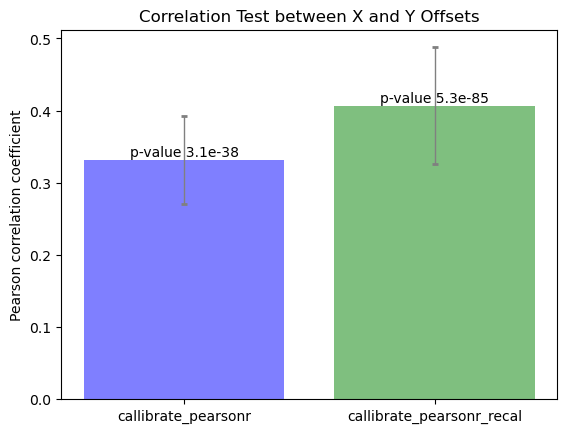

In [10]:
df = pd.read_csv(error_df_path, index_col=False)

cases_with_lower_coeff = 0
cases_with_high_coeff_and_low_p = 0

for index, row in df.iterrows():
    r = [json.loads(row['callibrate_pearsonr']), json.loads(row['callibrate_pearsonr_recal'])]

    if abs(r[0][0]) > abs(r[1][0]):
        cases_with_lower_coeff+=1
    elif r[1][1] < 0.05 and abs(r[1][0]) > 0.5:
        cases_with_high_coeff_and_low_p+=1

cases_with_lower_coeff = cases_with_lower_coeff/ len(df.index)
cases_with_high_coeff_and_low_p = cases_with_high_coeff_and_low_p/ len(df.index)
p = df['callibrate_pearsonr'].apply(lambda p: abs(json.loads(p)[1]))
p_recal = df['callibrate_pearsonr_recal'].apply(lambda p: abs(json.loads(p)[1]))

df['callibrate_pearsonr'] = df['callibrate_pearsonr'].apply(lambda p: abs(json.loads(p)[0]))
df['callibrate_pearsonr_recal'] = df['callibrate_pearsonr_recal'].apply(lambda p: abs(json.loads(p)[0]))
df = df[['callibrate_pearsonr', 'callibrate_pearsonr_recal']]
for column in df:
    winsorize(df[column], limits=(0.2,0.2), inplace=True)

y_std = df.std()/np.sqrt(df.shape[0])*1.96
xvals = range(len(df.columns))
yvals = df.mean()

bar1 = plt.bar(xvals, yvals, yerr=y_std, align='center', alpha=0.5, color = ['blue','green'], error_kw=dict(ecolor='gray', lw=1, capsize=2, capthick=2))
plt.xticks(range(len(df.columns)),  df.columns)
plt.ylabel('Pearson correlation coefficient')
plt.title('Correlation Test between X and Y Offsets')

pears = [p.median(),p_recal.median()]

for i,rect in enumerate(bar1):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, height, 'p-value '+f'{pears[i]:.1e}', ha='center', va='bottom')


pears

# y = [4, 9, 2]
# z = [1, 2, 3]
# ax = plt.subplot(11)
# ax.bar(x-0.2, y, width=0.2, color='b', align='center')
# ax.bar(x, z, width=0.2, color='g', align='center')
# ax.xaxis_date()
# plt.show()